<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ライブラリ読み込み" data-toc-modified-id="ライブラリ読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ライブラリ読み込み</a></span></li><li><span><a href="#データ読み込み" data-toc-modified-id="データ読み込み-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>データ読み込み</a></span></li><li><span><a href="#データ成形" data-toc-modified-id="データ成形-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>データ成形</a></span></li><li><span><a href="#画像の表示" data-toc-modified-id="画像の表示-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>画像の表示</a></span></li><li><span><a href="#モデル実装" data-toc-modified-id="モデル実装-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>モデル実装</a></span></li></ul></div>

2章をPyTorchベースで書くことを通じ、PyTorchの書き方に習熟する。

## ライブラリ読み込み

In [6]:
import torch
from torch import nn 
from torch.functional import F
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## データ読み込み

- PyTorchではデータを受け取る前に**torchvision.transform**(前処理機)を呼び出して定義する。
- リストを渡すことでその順番で前処理を行ってくれる。

参考: https://pystyle.info/pytorch-list-of-transforms/

Memo: tensorflowでいうところのいうところのto_categoricalは不要と思われる

In [8]:

transform = transforms.Compose(
    [
        transforms.ToTensor(), # テンソル化
        transforms.Normalize(  # 正規化
            (0.5, 0.5, 0.5), # 平均
            (0.5, 0.5, 0.5)  # 標準偏差
        )
    ]
)

- データセット: **torchvision.datasets**に用意されている。trainset[idx]のような形でデータセットを取り出すことが可能
- **torch.utils.data.DataLoader**: データセットからミニバッチを作成するクラス。イテレートした時にそのミニバッチを返してくれる。
- train引数がTrueかFalseかでトレイン・テストが別れている

参考: https://pystyle.info/pytorch-dataloader/

In [23]:
trainset=CIFAR10(root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [25]:
testset=CIFAR10(root='../data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [28]:
for i, _item in enumerate(testloader):
    if i>3:
        break
    else:
        print(i)
        print(_item)


0
[tensor([[[[-0.1529, -0.1843, -0.1451,  ..., -0.0353, -0.0431, -0.0196],
          [-0.1294, -0.1451, -0.1059,  ..., -0.1137, -0.1373, -0.0902],
          [-0.1294, -0.1294, -0.1373,  ..., -0.1451, -0.1608, -0.1686],
          ...,
          [-0.1686, -0.1529, -0.2235,  ..., -0.6314, -0.4588, -0.3098],
          [-0.2314, -0.2078, -0.2235,  ..., -0.2863, -0.3804, -0.3098],
          [-0.2314, -0.2235, -0.2549,  ..., -0.2471, -0.2392, -0.2157]],

         [[-0.2784, -0.3020, -0.2627,  ..., -0.1922, -0.2000, -0.1765],
          [-0.2549, -0.2706, -0.2314,  ..., -0.2392, -0.2627, -0.2078],
          [-0.2549, -0.2549, -0.2627,  ..., -0.2471, -0.2627, -0.2706],
          ...,
          [-0.2941, -0.2784, -0.3490,  ..., -0.7176, -0.5608, -0.4039],
          [-0.3569, -0.3255, -0.3490,  ..., -0.3647, -0.4745, -0.4039],
          [-0.3569, -0.3490, -0.3804,  ..., -0.3255, -0.3255, -0.3098]],

         [[-0.3961, -0.4196, -0.3804,  ..., -0.3176, -0.3255, -0.3020],
          [-0.3725, -0.3882

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
trainset.data.dtype

dtype('uint8')

## データ成形

In [19]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [14]:
trainset.data.shape

(50000, 32, 32, 3)

## 画像の表示

1. 前述のように、**torchvision.utils.DataLoader**がイテレーティブであることを利用して、DataLoaderオブジェクトをイテレーティブに呼び出す
    (表示される画像が毎回変わるはず)
2. データセットから直接呼び出す

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


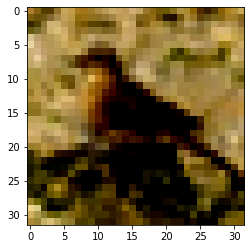

In [36]:
# 方法1
for i, (images, labels) in enumerate(testloader, 0):
    for k in range(0, images.size()[0]):
        numpy_array=images[k].numpy().transpose((1,2,0))
        plt.imshow(numpy_array)
    break
plt.show()

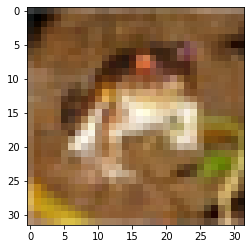

In [47]:
# 方法2 (実行結果は毎回変わらない)
for i in range(1):
  image, label = trainset[i]
  np_image = image.numpy().copy()
  img = np.transpose(np_image, (1,2,0) )
  img2 = (img + 1)/2
  plt.imshow(img2)
plt.show()


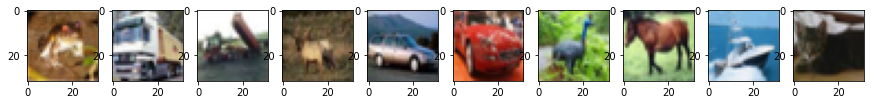

In [48]:
# 方法2 
plt.figure(figsize=(15,4))
for i in range(10):
  ax = plt.subplot(1, 10, i+1)
  image, label = trainset[i]
  np_image = image.numpy().copy()
  img = np.transpose(np_image, (1,2,0) )
  img2 = (img + 1)/2
  plt.imshow(img2)
plt.show()


以降wip

## モデル実装

In [49]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.relu    = nn.ReLU()
        self.linear_1 = nn.Linear( 3072, 200 )
        self.linear_2 = nn.Linear( 200, 150 )
        self.linear_3 = nn.Linear( 150, 10)

    def forward(self, x):
        out = self.flatten(x)
        out = self.relu(out)
        out = self.linear_1(out)
        out = self.linear_2(out)
        out = self.linear_3(out)
        out = torch.softmax(out, dim=-1)

        return out

In [ ]:
model = model()

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# PyTorchは各機能がコンポーネントとして提供されているのみであり、学習ループは自分で実装しないといけない。
# 参考：https://qiita.com/Rahariku/items/69b512fad60242fbd6ac#mnist%E3%83%87%E3%83%BC%E3%82%BF%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF
for epoch in range(5):
  print(f"Epoch {epoch+1}/5")
  for idx, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
loss.item()

2.4611501693725586

In [ ]:
import tqdm

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
outputs = []
ys = []

model.eval()
model = model.to(device)

with tqdm(testloader, desc=f'[Batch 0000] Loss:0.000', leave=True) as batch_iter:
    for batch_idx, (images, labels) in enumerate(batch_iter):

        images = images.to(device)
        with torch.no_grad():
            out = model(images)
            outputs += [o.item() for o in out.cpu().argmax(dim=-1)]
            ys += [l.squeeze().item() for l in labels]

[Batch 0000] Loss:0.000:   0%|          | 0/2500 [00:00<?, ?it/s]

In [ ]:
accuracy = accuracy_score(ys, outputs)
print(f'accuracy: {accuracy:0.3f}')

accuracy: 0.143


In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(testloader)), n_to_show)

fig = plt.figure(figsize=(20,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
  

for i, idx in enumerate(trainloader):
    img, label = testloader[idx]
    img = img.clip(min=0.0, max=1.0).numpy()
    img = np.transpose(img, (1, 2, 0))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(output_classes[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'true= ' + str(actual_classes[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

TypeError: ignored

<Figure size 1440x216 with 0 Axes>

In [ ]:

# 参考: https://qiita.com/Rahariku/items/69b512fad60242fbd6ac#mnist%E3%83%87%E3%83%BC%E3%82%BF%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF